**Power Analysis for Experimental Design**

This notebook provides basic code to help determine the appropriate sample size for an experiment. Power analysis ensures that an experiment has sufficient power to detect a meaningful effect, if one exists, and can assist in using resources efficiently.

In the following sections, we:

* Estimate effect size
* Determine the sample size required for a desired power (by default, 0.8)
* Visualize power across a range of sample sizes
* Calculate the minimum detectable effect size for a certain sample size

In [1]:
!pip install -q pingouin statsmodels matplotlib

In [2]:
import numpy as np
import pingouin as pg
import matplotlib.pyplot as plt
from statsmodels.stats.power import TTestIndPower

**Estimate Effect Size**

Cohen's d represents the difference between two groups' means in units of standard deviation. Typically, d = 0.2 is a small effect size, 0.5 is medium, and 0.8 is a large effect size.

In [3]:
mean1 = float(input("Enter the mean for group 1: "))
std1 = float(input("Enter the standard deviation for group 1: "))
n1 = int(input("Enter the sample size for group 1: "))

mean2 = float(input("Enter the mean for group 2: "))
std2 = float(input("Enter the standard deviation for group 2: "))
n2 = int(input("Enter the sample size for group 2: "))

Enter the mean for group 1: 2
Enter the standard deviation for group 1: 1
Enter the sample size for group 1: 100
Enter the mean for group 2: 1.5
Enter the standard deviation for group 2: 1
Enter the sample size for group 2: 100


In [5]:
# Generate synthetic datasets with random distributions
group1 = np.random.normal(mean1, std1, n1)
group2 = np.random.normal(mean2, std2, n2)

# Calculate the effect size
cohen_d = pg.compute_effsize(group1, group2, eftype='cohen')

print(f"Cohen's d: {cohen_d}")

Cohen's d: 0.5674722058772257


**Determine Sample Size**

To determine the necessary sample size, you need to set the alpha (AKA, significance) level and desired power.

The significance level represents the probability of falsely concluding that there is an effect when there is none--typically set at 0.05.

Power represents the probability of correctly detecting a true effect if one exists--typically set at 0.8.

In [6]:
# Enter the effect size
effect_size = float(input("Enter the effect size: "))

# Initialize the power analysis object
analysis = TTestIndPower()

# Calculate the sample size needed for a two-sample t-test
sample_size = analysis.solve_power(effect_size=effect_size, power=0.8, alpha=0.05, ratio=1, alternative='two-sided')

print(f"Sample size needed: {np.ceil(sample_size)}") # Rounding up to nearest whole number

Enter the effect size: 0.5
Sample size needed: 64.0


**Visualize Power for Different Sample Sizes**

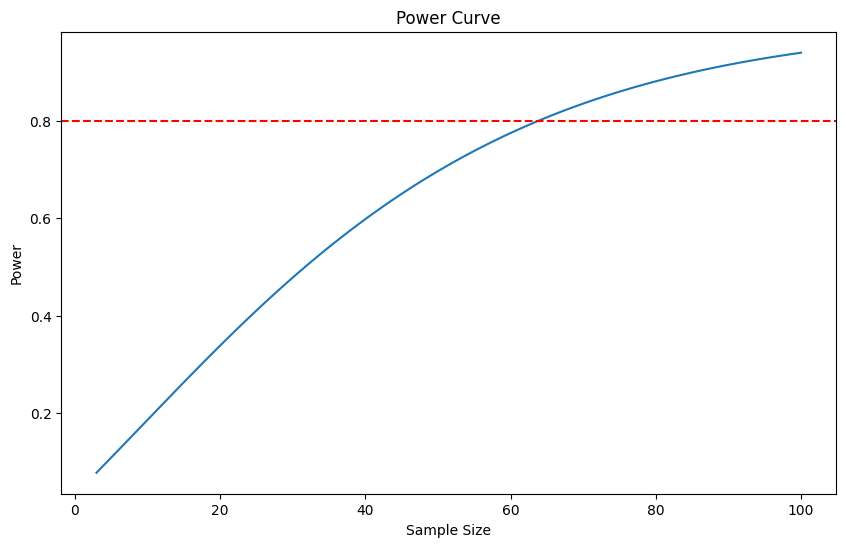

In [7]:
# Set the range of sample sizes to visualize
sample_min = 3
sample_max = 100

# Plot a power curve for the range of sample sizes
sample_sizes = np.arange(sample_min, sample_max + 1)
analysis = TTestIndPower()

powers = analysis.power(effect_size=effect_size, nobs1=sample_sizes, alpha=0.05, ratio=1.0, alternative='two-sided')

plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, powers)
plt.title('Power Curve')
plt.xlabel('Sample Size')
plt.ylabel('Power')
plt.axhline(y=0.8, color='r', linestyle='--')
plt.show()

**Sensitivity Analysis**

Determine the minimum detectable effect size for a given sample size, assuming that the data are normally distributed and observations are independent.

In [8]:
# Calculate the minimum detectable effect size
sample_size = float(input("Enter the sample size: "))

analysis = TTestIndPower()
effect_size = analysis.solve_power(effect_size=None, nobs1=sample_size, alpha=0.05, power=0.8, ratio=1, alternative='two-sided')

print(f"Minimum detectable effect size: {effect_size}")

Enter the sample size: 80
Minimum detectable effect size: 0.4456842248588056
